In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
tfd = tfp.distributions

# Data Viz. 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

# Get TensorFlow version.
print(f'TnesorFlow version: {tf.__version__}')
print(f'TnesorFlow Probability version: {tfp.__version__}')

2022-06-17 14:28:08.308378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 14:28:08.308392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TnesorFlow version: 2.9.1
TnesorFlow Probability version: 0.17.0-dev20220525


In [2]:
import numpy as np
import pandas as pd

import arviz as az
import corner

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

tf.enable_v2_behavior()

tfd = tfp.distributions
tfb = tfp.bijectors

In [4]:
import bilby

from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [5]:
label = 'GW150914'
time_of_event = bilby.gw.utils.get_event_time(label)

In [6]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [7]:
H1_data = TimeSeries.fetch_open_data("H1", time_of_event, 
                                     time_of_event + 2,
                                     sample_rate=4096, cache=True)

L1_data = TimeSeries.fetch_open_data("L1", time_of_event, 
                                     time_of_event + 2,
                                     sample_rate=4096, cache=True)

In [8]:
H1.set_strain_data_from_gwpy_timeseries(H1_data)
L1.set_strain_data_from_gwpy_timeseries(L1_data)

In [9]:
interferometers = [H1, L1]

In [10]:
prior = {}
prior['mass_ratio'] = 0.977647
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066
prior['phase'] =  5.30408
prior['geocent_time'] = 1126259462.4146729

prior['chirp_mass'] = Uniform(
    name='chirp_mass',
    latex_label='$M$',
    minimum=250.0,
    maximum=350.0,
    unit='$M_{\\odot}$')

prior = {}
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=3.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066


In [11]:
prior_dict = bilby.core.prior.PriorDict(prior)

In [12]:
example = prior_dict.sample()

In [13]:
log_p = prior_dict.ln_prob(example)

In [14]:
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=100.)

waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

14:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [15]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers,
    waveform_generator,
    priors=prior)

In [16]:
w = waveform_generator.frequency_domain_strain(example)

/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


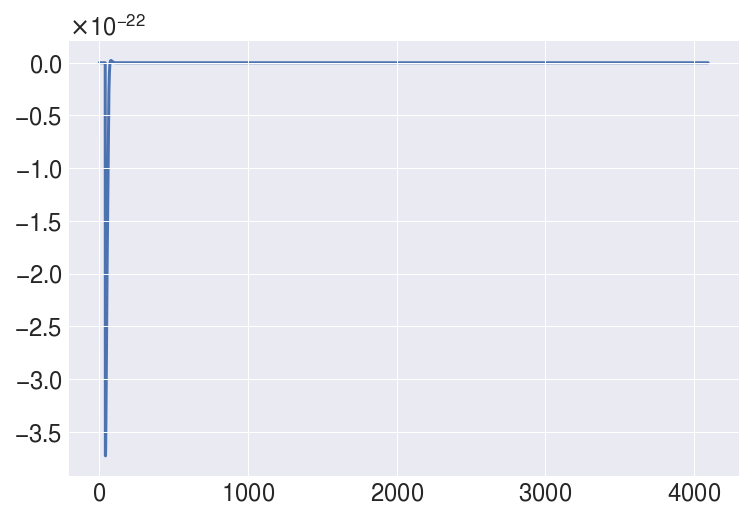

In [17]:
plt.plot(w['plus'])

In [18]:
likelihood.parameters.update(example)
log_l = likelihood.log_likelihood() 
log_post = log_p + log_l

14:28 bilby INFO    : Generating frequency domain strain from given time domain strain.
14:28 bilby INFO    : Applying a tukey window with alpha=0.2, roll off=0.2
14:28 bilby INFO    : Generating frequency domain strain from given time domain strain.
14:28 bilby INFO    : Applying a tukey window with alpha=0.2, roll off=0.2


In [19]:
print(log_post)

-153546709.11199293


2022-06-17 14:28:26.820934: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-17 14:28:26.820963: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (auratrik-Lenovo-Legion-5-15IMH05): /proc/driver/nvidia/version does not exist
2022-06-17 14:28:26.821929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


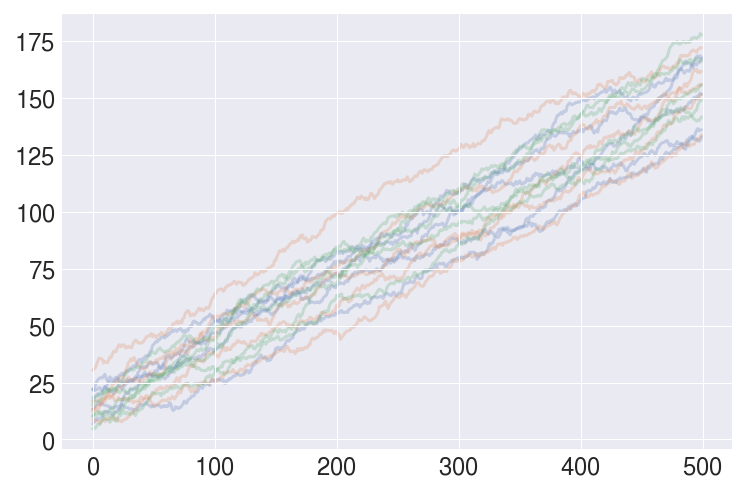

In [20]:
ndim = 3
nsample, nchain = 500, 5

def target_log_prob(log_post):
    #mean, var= tf.nn.moments(x, axes = [0, 1], keepdims = True)
    #return -tf.reduce_sum(((2*np.pi*var)**(-0.5))*np.exp((-(x - mean)**2)/(2*var)))
    return tf.convert_to_tensor(log_post)

hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=target_log_prob,
    num_leapfrog_steps=3,
    step_size=.25)

samples, is_accepted = tfp.mcmc.sample_chain(
    kernel=hmc_kernel,
    num_results=nsample,
    num_burnin_steps=50,
    trace_fn=lambda _, pkr: pkr.is_accepted,
    current_state=tf.zeros([nchain, ndim]))

for i in range(ndim):
  plt.plot(samples[..., i], alpha=.25, color=f'C{i}');
#plt.plot(samples[..., 1], alpha=.25, color=f'C{i}');

In [21]:
print(samples)

tf.Tensor(
[[[ 17.07002    12.048726    4.683225 ]
  [ 13.276338   13.210605   18.586271 ]
  [ 22.186605   16.065136   10.144564 ]
  [ 21.720957   30.400908   14.981897 ]
  [  6.829021    8.8453665  10.407752 ]]

 [[ 18.12112    13.238546    5.197949 ]
  [ 14.247833   13.510643   18.718136 ]
  [ 21.560116   16.796654   10.801955 ]
  [ 22.627523   31.146324   16.088312 ]
  [  7.8104534   8.007842   11.120107 ]]

 [[ 18.670528   13.432801    4.9376287]
  [ 14.390521   13.394863   18.469788 ]
  [ 21.543653   16.924707   11.896757 ]
  [ 23.52498    31.277622   17.068132 ]
  [  9.002793    7.7325215  11.122484 ]]

 ...

 [[165.55154   155.55818   154.57918  ]
  [167.88994   132.03531   140.1391   ]
  [151.74292   161.87592   166.73878  ]
  [131.02223   171.69095   147.93881  ]
  [135.63976   149.69472   176.95615  ]]

 [[166.12549   155.29378   155.97137  ]
  [168.64342   132.90804   140.98088  ]
  [152.24678   161.26357   166.17381  ]
  [131.49487   172.17668   149.15852  ]
  [136.06213   

In [22]:
sample_mean = tf.reduce_mean(samples, axis=0)
print(sample_mean)


tf.Tensor(
[[ 95.74019   82.79033   78.85872 ]
 [ 86.21419   65.17282   83.71588 ]
 [ 88.73362   91.857475  93.506035]
 [ 76.46904  107.95179   76.03418 ]
 [ 68.41891   74.3256    94.280014]], shape=(5, 3), dtype=float32)


/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (500) than draws (5). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


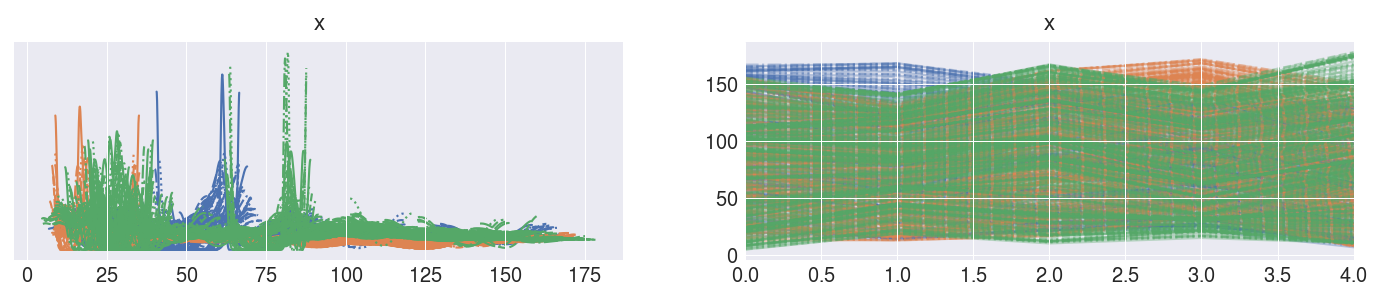

In [23]:
az.plot_trace(samples.numpy());

In [24]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

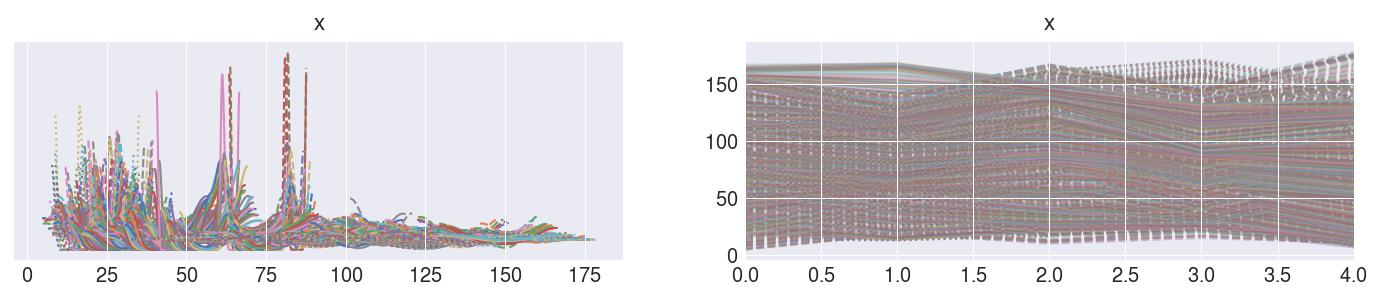

In [25]:
az.plot_trace(np.asarray(samples).T);

In [26]:
chains_df = pd.DataFrame([t.numpy() for t in samples[i]])
chains_df = chains_df.T.melt(var_name='chain_id', value_name='sample')
chains_df.head()

,chain_id,sample
0,0,18.670528
1,0,13.432801
2,0,4.937629
3,1,14.390521
4,1,13.394863


/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/auratrik/Anaconda33/envs/igwn-py39-lw/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

IndexError: list index out of range

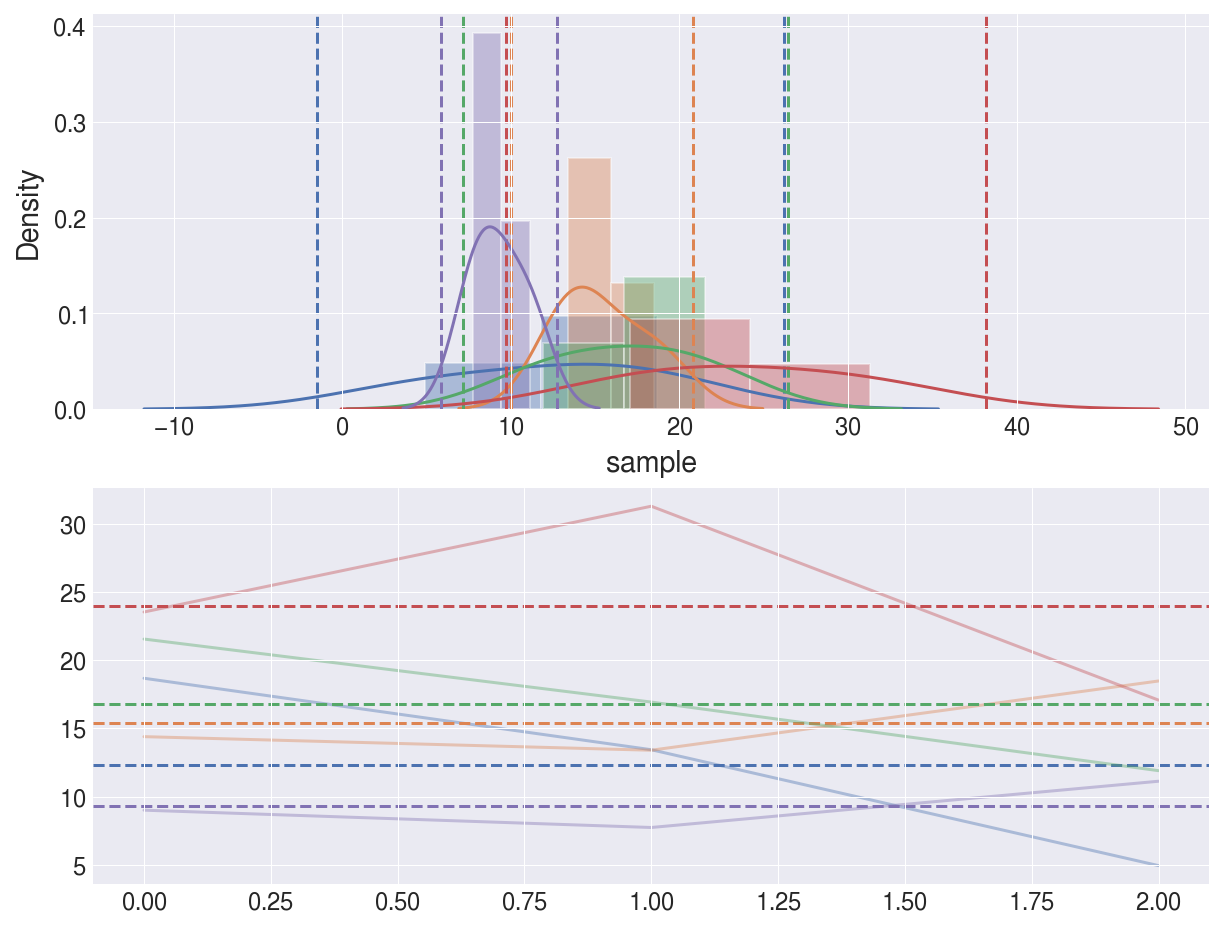

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

for i in range(500):
    chain_samples = chains_df \
        .query(f'chain_id == {i}') \
        .reset_index(drop=True) \
        ['sample']

    chain_samples_mean = chain_samples.mean()
    chain_samples_std = chain_samples.std()
    chain_samples_plus = chain_samples_mean + 2*chain_samples_std
    chain_samples_minus = chain_samples_mean - 2*chain_samples_std

    sns.distplot(a=chain_samples, color=sns_c[i], hist_kws={'alpha': 0.4}, label=f'chain_{i}', ax=ax[0])
    ax[0].axvline(x=chain_samples_plus, linestyle='--', color=sns_c[i], label=f'chain_{i}_plus = {chain_samples_plus: 0.2f}')
    ax[0].axvline(x=chain_samples_minus, linestyle='--', color=sns_c[i], label=f'chain_{i}_minus = {chain_samples_minus: 0.2f}')
    ax[1].plot(chain_samples, c=sns_c[i], alpha=0.4)
    ax[1].axhline(y=chain_samples_mean, linestyle='--', color=sns_c[i], label=f'chain_{i} mean = {chain_samples_mean: 0.2f}')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set(xlabel='rate', ylabel='')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].set(xlabel='sample', ylabel='rate')

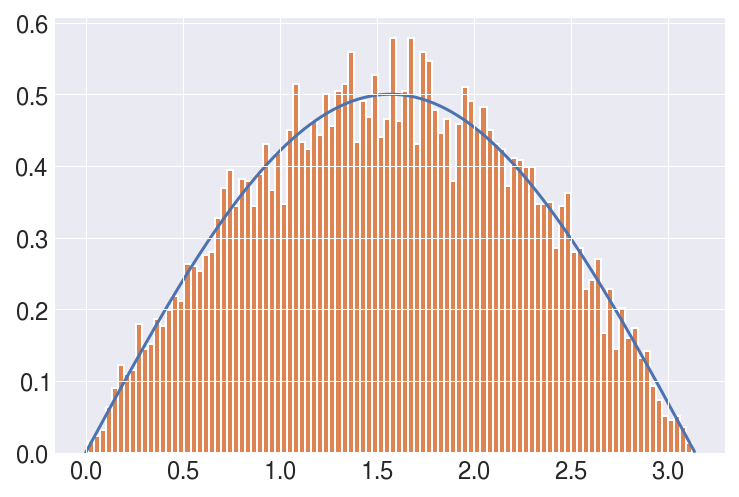

In [28]:
#Instructions to define a custom prior that does not exist in tfp :

from tensorflow_probability.python.internal import reparameterization
from tensorflow_probability.python.internal import tensor_util
from tensorflow_probability.python.util.seed_stream import SeedStream

class tfd_Sine(tfd.Distribution):
  def __init__(self, dtype=tf.float32, name='Sine'):
    with tf.name_scope(name) as name:
      self.lower = tf.constant(0., dtype=dtype)
      self.upper = tf.constant(np.pi, dtype=dtype)
      super(tfd_Sine, self).__init__(
          dtype=dtype,
          reparameterization_type=reparameterization.NOT_REPARAMETERIZED,
          validate_args=False,
          allow_nan_stats=True,
          name=name)
    
  def _batch_shape_tensor(self, lower=None, upper=None):
    return tf.broadcast_dynamic_shape(
        tf.shape(self.lower if lower is None else lower),
        tf.shape(self.upper if upper is None else upper))

  def _log_prob(self, x):
    norm = (tf.math.cos(self.lower) - tf.math.cos(self.upper))
    return tf.math.log(tf.math.sin(x) / norm)
  
  def _prob(self, x):
    return tf.math.exp(self.log_prob(x))

  def _cdf(self, x):
    return ((tf.math.cos(x) - tf.math.cos(self.lower)) 
    / (tf.math.cos(self.upper) - tf.math.cos(self.lower)))

  def _sample_n(self, n, seed=None):
    seed = SeedStream(seed, salt='sine')
    x = tf.random.uniform(
        [n], minval=-1., maxval=1., dtype=self.dtype, seed=seed())
    return tf.math.acos(x)

  def _default_event_space_bijector(self):
    return tfb.Sigmoid(
        low=self.lower, high=self.upper, validate_args=self.validate_args)

theta_jn = tfd_Sine(tf.float32)
x = tf.linspace(0., np.pi, 1000)
plt.plot(x, theta_jn.prob(x));
plt.hist(theta_jn.sample(10000), 100, density=True);

result_mc = bilby.run_sampler(log_l,
                              log_p,
                              sampler='dynesty',
                              outdir='short_mc_only',
                              walks=5,
                              nlive=50,
                              label=label)